In [3]:
from functions.N_fctn_load_excel import load_excel_to_dataframe
from functions.Z_fctn_concat_df import concat_dataframes
import pandas as pd

from functions.B_fctn_rename_columns import rename_columns


df = load_excel_to_dataframe('ancient_artifacts.xlsx')

df = rename_columns(df, {3:'profile'})

In [5]:
from functions.Z_fctn_merge_dfs import merge_dataframes
daf = load_excel_to_dataframe('MAIN_DATA.xlsx')
df_fin = merge_dataframes(df, daf, 'profile')

df_fin = rename_columns(df_fin, {'Unnamed: 0':'artif_name', 0:'likes', 1:'viewed', 2:'comments_under', 4:'photograph', 5:'uploaded', 6:'region_of_find', 7:'soil_state', 8:'depth_of_find', 9:'detector_used', 10: 'submitted_to'})


In [6]:

#extracting numbers from variables:
from functions.Z_fctn_extract_numbers import extract_numbers

df_fin = extract_numbers(df_fin, ['likes', 'viewed', 'comments_under', 'depth_of_find'])
#print(df)
#print(df_fin.columns)


from functions.B_fctn_drop_columns import drop_columns

df_fin = drop_columns(df_fin, ['area_municipality',
       'municipality_type', 'population_density','photograph',
       'region_of_find', 'soil_state', 'submitted_number_artifs','number_artifs','number_coins','submitted_number_coins','rate_artifs_dummy', 'rate_coins_dummy','uploaded_at_least_one_artif_or_coin_dummy'])



In [7]:
#creating the year variable:

from functions.Z_fctn_create_year_column import create_new_column

df_fin = create_new_column(df_fin, 'uploaded')



from functions.Z_fctn_assign_year_number import assign_year_numbers

df_fin = assign_year_numbers(df_fin, 'uploaded', 'uploaded_year')

#print(df_fin[['uploaded', 'uploaded_year']])

In [8]:
from functions.C_fctn_create_dummy import create_dummy_variable

df_fin = create_dummy_variable(df_fin, 'submitted_to', replace= False) #creation of the main dependent variable


In [11]:

#searching for expensive detectors:

detectors_to_search = pd.DataFrame([
"Manticore",
"CTX 3030",
"GPX 5000",
"Excalibur II",
"Standard MP V2",
"Standard MP V3",
"Spectra V3i",
"GTI 2500",
"Axiom MS2",
"Axiom MS3",
"GPX 6000",
"GPZ 7000",
"SDC 2300",
"ATX",
"SSP-5100",
"UPEX ONE 2",
"GPX 4500",
"Invenio PRO"
])




In [12]:

#convert the above list to lower and without spaces:
from functions.A_fctn_replace_and_lowercase import replace_special_characters
from functions.E_fctn_remove_spaces import remove_spaces
#print(detectors_to_search)

detectors_to_search = replace_special_characters(detectors_to_search, 0)
#print(detectors_to_search)

detectors_to_search = remove_spaces(detectors_to_search, 0)
#print(detectors_to_search)

df_fin_copy = df_fin.copy()


In [13]:

#convert the dectors of people to lower and without spaces:
dfc = replace_special_characters(df_fin_copy, 'detector_used', new_column='detector_lower' )

#print(dfc['detektor_lower'])



dfc = remove_spaces(dfc, 'detector_lower')

#print(dfc['detector_lower'])


In [14]:

#create dummy whenever the detector is above 30k czk, i.e. above the average income at about the year 2018:
from functions.E_fctn_check_values_dummy import check_values

dfc = check_values(dfc, detectors_to_search, 'detector_lower', 'detector_exp_dummy')


In [16]:

from functions.E_fctn_display_unique_values import display_unique_values
display_unique_values_obj = display_unique_values(dfc, 'detector_exp_dummy')
print(display_unique_values_obj)


   Value  Count
0      0  12821
1      1    137


In [17]:

df_fin['detector_exp_dummy'] = dfc['detector_exp_dummy']

df_fin['detector_expensive_dummy'] = df_fin['detector_exp_dummy'] + df_fin['detector_expensive_dummy']

df_fin = create_dummy_variable(df_fin, 'detector_expensive_dummy', 0) #creation of detector expensive dummy out of the original and newly matched expensive metal detectors!



from functions.P_fctn_fill_missing_values import fill_missing_values
df_fin = fill_missing_values(df_fin,{'real_net_monetary_index':1, 
                                           'average_age':42.4734915211329, 
                                           'localities_rate': 0.021478453745227236}) 


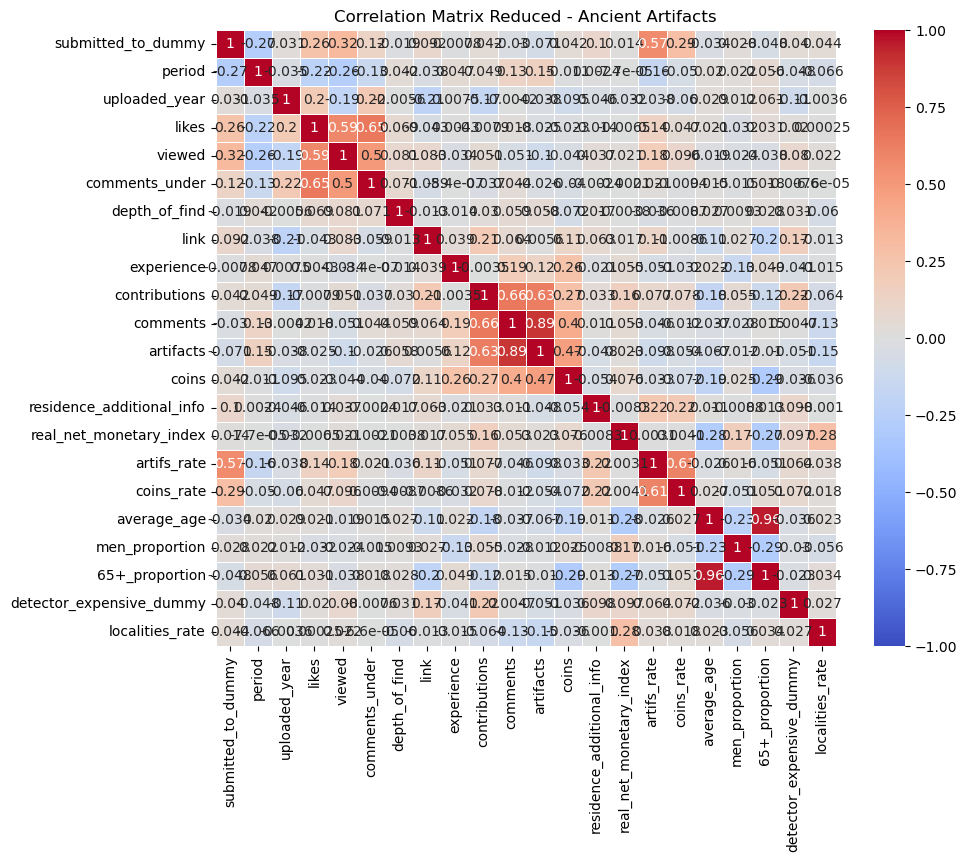

In [18]:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix

create_correlation_matrix(df_fin,['submitted_to_dummy','period','uploaded_year', 'likes', 'viewed','comments_under', 'depth_of_find', 'link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                                            
'localities_rate'],'Correlation Matrix Reduced - Ancient Artifacts')


In [19]:
#based on the corr matrix we drop the following variables:
df_fin = drop_columns(df_fin, ['depth_of_find',
       'coins', 'coins_rate',
       'men_proportion', '65+_proportion', 'detector_exp_dummy'])


In [20]:

from functions.Q_fction_get_summary_statistics import get_summary_statistics
summary_reduced_1 = get_summary_statistics(df_fin)
print(summary_reduced_1 )

                           count  unique  \
artif_name                 12958   12958   
likes                      12958     100   
viewed                     12958    2615   
comments_under             12958      84   
profile                    12958    2426   
uploaded                   12958      14   
detector_used               9187    1925   
submitted_to                2415      94   
period                     12958       7   
link                       12958       2   
experience                 12958     928   
contributions              12958      98   
comments                   12958     651   
artifacts                  12958     288   
residence_additional_info  12958       2   
municipality                4712     386   
municipal_office            4697     252   
real_net_monetary_index    12958     253   
artifs_rate                12958     300   
average_age                12958     253   
detector_expensive_dummy   12958       2   
localities_rate            12958

In [21]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics
summary_reduced_1_ext = get_extended_summary_statistics(df_fin)
print(summary_reduced_1_ext)


                             count     mean       std      min      25%  \
likes                      12958.0     7.12     10.32     0.00     2.00   
viewed                     12958.0  1091.70    732.86    72.00   631.00   
comments_under             12958.0     5.23      7.99     0.00     1.00   
uploaded                   12958.0  2017.57      2.96  2010.00  2015.00   
period                     12958.0     4.78      2.60     1.00     2.00   
link                       12958.0     0.11      0.32     0.00     0.00   
experience                 12958.0  8451.08  26413.42     0.00    91.00   
contributions              12958.0    30.27     93.24     0.00     0.00   
comments                   12958.0  1915.29   4254.36     0.00    76.00   
artifacts                  12958.0   253.91    528.51     1.00    35.00   
residence_additional_info  12958.0     0.02      0.15     0.00     0.00   
real_net_monetary_index    12958.0     1.00      0.04     0.81     1.00   
artifs_rate              

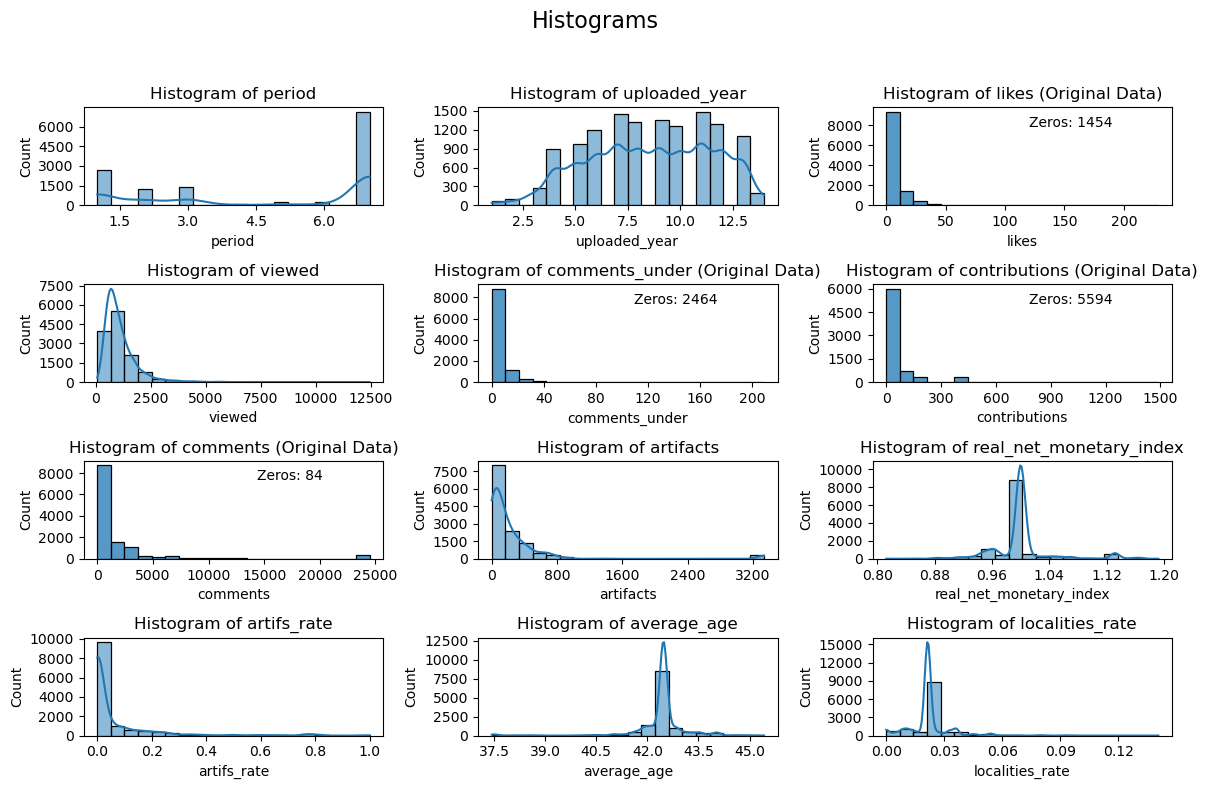

In [22]:

from functions.S_fctn_create_combined_hist import create_histograms_all
create_histograms_all(df_fin, ['period','uploaded_year', 'likes', 'viewed','comments_under',                                                                          
'contributions',
'comments',                                                                  
'artifacts',                                                                       
'real_net_monetary_index',                     
'artifs_rate',                                                               
'average_age',                                                                                                           
'localities_rate'])

In [23]:

import numpy as np
df_log = df_fin.copy()
df_log['log_likes'] = np.log(df_log['likes'].values + 1)
df_log['log_viewed'] = np.log(df_log['viewed'].values + 1)
df_log['log_comments_under'] = np.log(df_log['comments_under'].values + 1)
df_log['log_experience'] = np.log(df_log['experience'].values + 1)
df_log['log_contributions'] = np.log(df_log['contributions'].values + 1)
df_log['log_comments'] = np.log(df_log['comments'].values + 1)
df_log['log_artifacts'] = np.log(df_log['artifacts'].values + 1)
df_log['log_artifs_rate'] = np.log(df_log['artifs_rate'].values + 1)


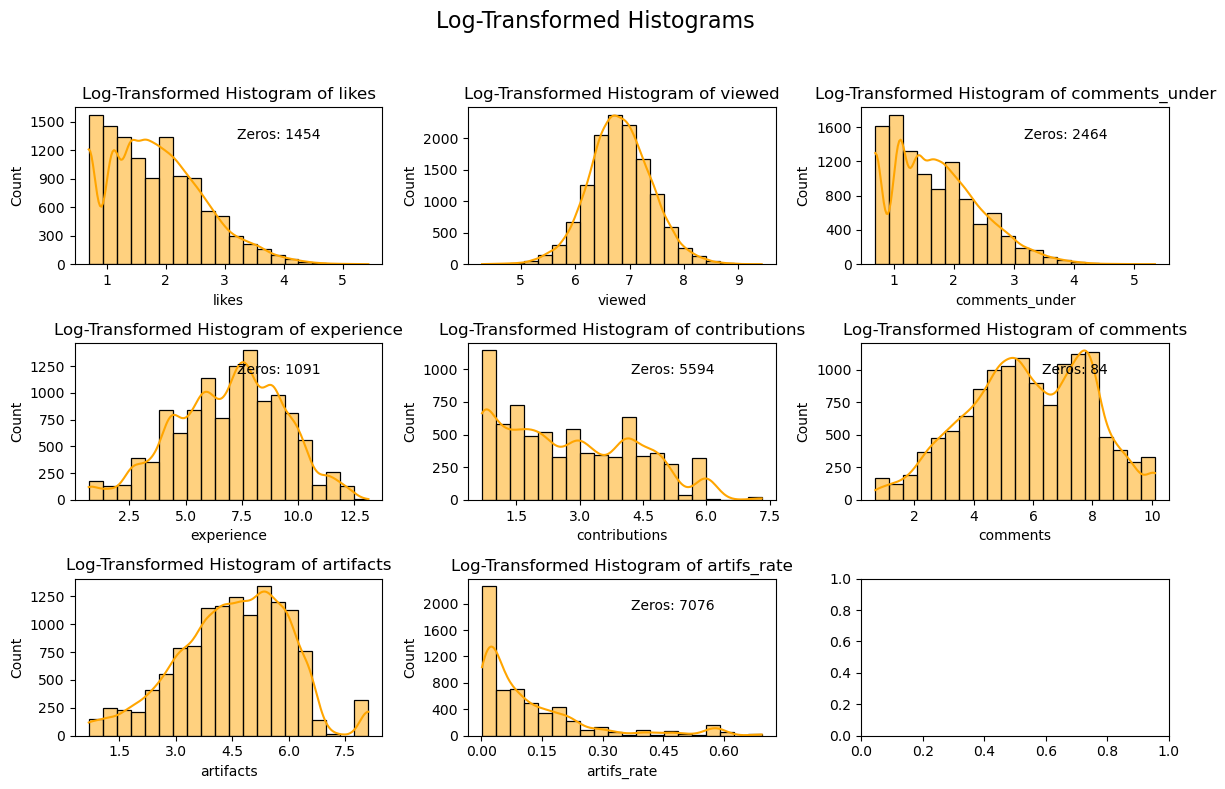

In [25]:
from functions.S_fctn_create_combined_hist import create_log_transformed_histograms
create_log_transformed_histograms(df_log, ['likes', 'viewed','comments_under','experience',                                                                          
'contributions',
'comments',                                                                  
'artifacts',                                                                                    
'artifs_rate'])

In [26]:

from functions.W_fctn_print_top import print_top_observations
df_log_2 = df_log.copy()

df_log_2 = df_log_2[df_log_2['experience'] != 498425] #ok
df_log_2 = df_log_2[df_log_2['contributions'] != 1489] #ok
df_log_2 = df_log_2[df_log_2['comments'] != 24463] #ok
df_log_2 = df_log_2[df_log_2['artifacts'] != 3332] #ok



df_log_3 = df_log_2.copy()

print_top_observations(df_log_3, columns=['likes', 'viewed', 'comments_under','experience','contributions',               
'comments',                    
'artifacts'], num_observations=10)

Top 10 observations for column 'likes':
      likes  viewed  comments_under  experience  contributions  comments  \
7142    229   12438             129         568              2       644   
8018    156    6411              42         378              9      1602   
4225    152    8458              62       12364             71      1025   
8056    149    7219              69           0             24       183   
7757    146    7064              49          37              1        28   
5126    127    7027             136          81              0         9   
2962    125    8437             112       13286             71      6244   
7857    117    4735              40          25              0         6   
3462    112    7123             103          26              0        32   
5457    111    5738              45       20844              0      1997   

      artifacts  
7142         30  
8018        103  
4225        177  
8056          1  
7757         33  
5126         10

In [27]:
from functions.V_fctn_OLS_ROBUST import ols_regression_robust


model2_LPM = ols_regression_robust(df_log_3, 'submitted_to_dummy', ['period','uploaded_year', 'log_likes', 'log_viewed','log_comments_under', 'link',                                        
'log_experience',                                  
'log_contributions',
'log_comments',                                                                  
'log_artifacts',                                                                       
'residence_additional_info','real_net_monetary_index',                     
'log_artifs_rate',                                                               
'average_age',                                                               
'detector_expensive_dummy',                                            
'localities_rate'])


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:     submitted_to_dummy   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:39:15   Log-Likelihood:                -2429.6
No. Observations:               12609   AIC:                             4893.
Df Residuals:                   12592   BIC:                             5020.
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

Optimization terminated successfully.
         Current function value: 0.254398
         Iterations 8


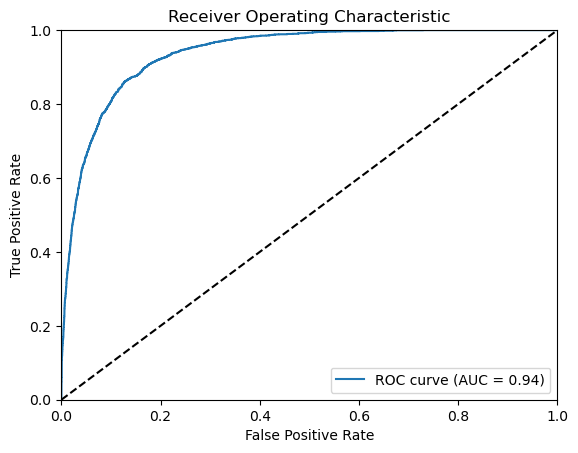

Confusion Matrix:
Predicted     0     1
Actual               
0          9799   404
1           935  1471

Logit Regression Summary:
                           Logit Regression Results                           
Dep. Variable:     submitted_to_dummy   No. Observations:                12609
Model:                          Logit   Df Residuals:                    12592
Method:                           MLE   Df Model:                           16
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.4781
Time:                        21:39:34   Log-Likelihood:                -3207.7
converged:                       True   LL-Null:                       -6145.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -17.2255      2.359

In [28]:
from functions.V_fctn_LOGIT import logit_regression_roc_wald
model2_LOGIT = logit_regression_roc_wald(df_log_3, 'submitted_to_dummy', ['period','uploaded_year', 'log_likes', 'log_viewed','log_comments_under', 'link',                                        
'log_experience',                                  
'log_contributions',
'log_comments',                                                                  
'log_artifacts',                                                                       
'residence_additional_info','real_net_monetary_index',                     
'log_artifs_rate',                                                               
'average_age',                                                               
'detector_expensive_dummy',                                            
'localities_rate'], hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])


Optimization terminated successfully.
         Current function value: 0.255626
         Iterations 7


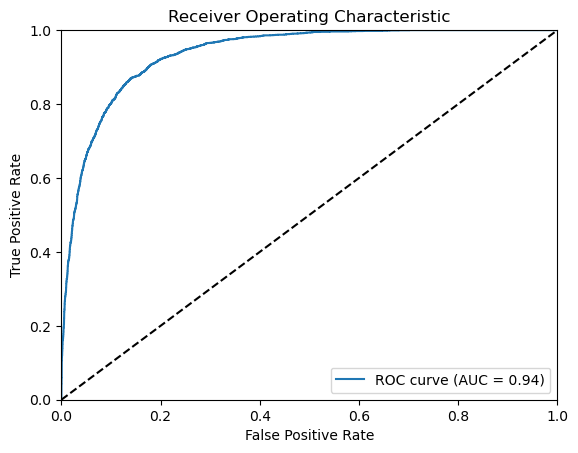

Confusion Matrix:
Predicted     0     1
Actual               
0          9838   365
1          1021  1385

Probit Regression Summary:
                          Probit Regression Results                           
Dep. Variable:     submitted_to_dummy   No. Observations:                12609
Model:                         Probit   Df Residuals:                    12592
Method:                           MLE   Df Model:                           16
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.4755
Time:                        21:39:55   Log-Likelihood:                -3223.2
converged:                       True   LL-Null:                       -6145.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -9.8186      1.27

In [29]:
from functions.V_fctn_PROBIT import probit_regression_roc_wald
model2_PROBIT = probit_regression_roc_wald(df_log_3, 'submitted_to_dummy', ['period','uploaded_year', 'log_likes', 'log_viewed','log_comments_under', 'link',                                        
'log_experience',                                  
'log_contributions',
'log_comments',                                                                  
'log_artifacts',                                                                       
'residence_additional_info','real_net_monetary_index',                     
'log_artifs_rate',                                                               
'average_age',                                                               
'detector_expensive_dummy',                                            
'localities_rate'],
hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])

Regression Summary:
                               OLS Regression Results                               
Dep. Variable:     detector_expensive_dummy   R-squared:                       0.035
Model:                                  OLS   Adj. R-squared:                  0.035
Method:                       Least Squares   F-statistic:                     61.25
Date:                      Thu, 10 Aug 2023   Prob (F-statistic):           2.65e-39
Time:                              21:40:12   Log-Likelihood:                 5338.0
No. Observations:                     12609   AIC:                        -1.067e+04
Df Residuals:                         12605   BIC:                        -1.064e+04
Df Model:                                 3                                         
Covariance Type:                        HC1                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

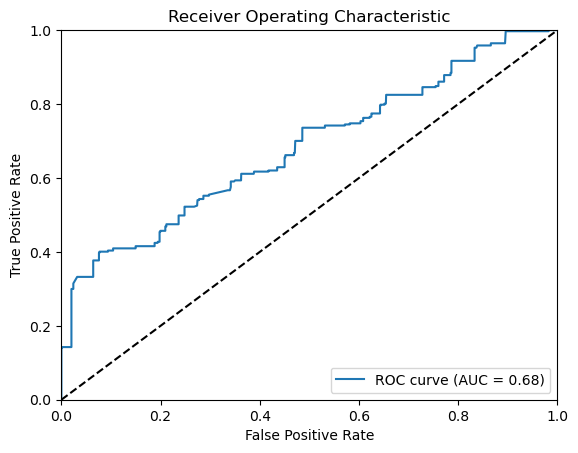

Confusion Matrix:
Predicted      0  1
Actual             
0          12272  0
1            330  7

Probit Regression Summary:
                             Probit Regression Results                              
Dep. Variable:     detector_expensive_dummy   No. Observations:                12609
Model:                               Probit   Df Residuals:                    12605
Method:                                 MLE   Df Model:                            3
Date:                      Thu, 10 Aug 2023   Pseudo R-squ.:                 0.09923
Time:                              21:40:12   Log-Likelihood:                -1399.0
converged:                             True   LL-Null:                       -1553.1
Covariance Type:                  nonrobust   LLR p-value:                 1.646e-66
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const     

In [30]:

model_simple = ols_regression_robust(df_log_3, 'detector_expensive_dummy', ['experience', 'contributions', 'real_net_monetary_index'])

model_simple2 = probit_regression_roc_wald(df_log_3, 'detector_expensive_dummy', ['experience', 'contributions', 'real_net_monetary_index'])
